In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
EPOCHS = 20


c:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#wyświetl zawartość zbiory y_train
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

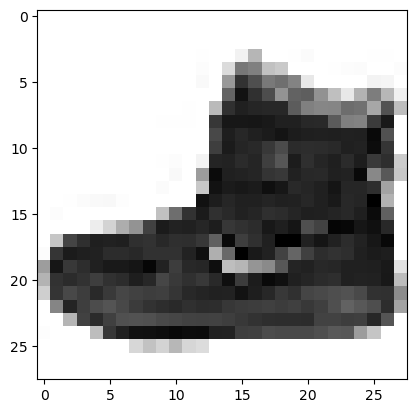

In [4]:
#za pomocą imshow wyświetl pierszy element zbioru x_train
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [5]:
pd.options.display.max_columns = None
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


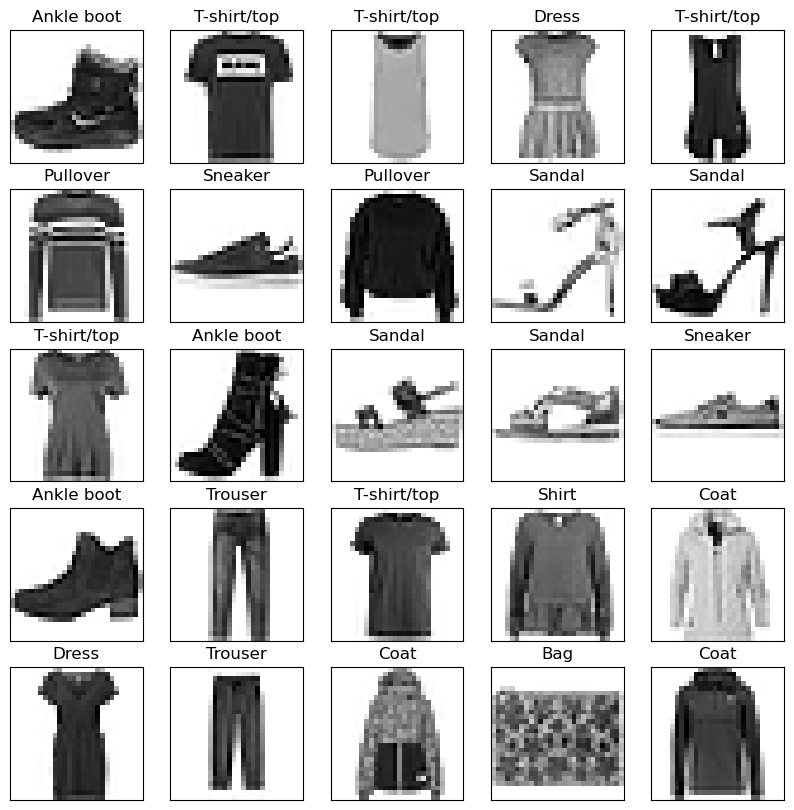

In [6]:
#za pomocą polecenia subplot wyświetl 25 pierwszych elementów zbioru x_train jako title wykresu wyświetl 
#opowiadającą danemu rysunkowi wartość ze zbioru y_train

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[y_train[i]])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [7]:
#zamień wartości w zbiorze testowym i treningowym na zakres od 0 do 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [17]:
#przygotuj siec wg swojego uznania. Może być taka jak poprzednio
num_classes = len(class_names)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [18]:
#naucz sieć
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2, callbacks=[es])

Epoch 1/20
1500/1500 [==============================] - 27s 16ms/step - loss: 0.5118 - accuracy: 0.8165 - val_loss: 0.4338 - val_accuracy: 0.8485
Epoch 2/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3776 - accuracy: 0.8623 - val_loss: 0.3750 - val_accuracy: 0.8613
Epoch 3/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3357 - accuracy: 0.8772 - val_loss: 0.3856 - val_accuracy: 0.8628
Epoch 4/20
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3142 - accuracy: 0.8827 - val_loss: 0.3327 - val_accuracy: 0.8792
Epoch 5/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2934 - accuracy: 0.8921 - val_loss: 0.3280 - val_accuracy: 0.8797
Epoch 6/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2789 - accuracy: 0.8955 - val_loss: 0.3160 - val_accuracy: 0.8874
Epoch 7/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2686 - accuracy: 0.8981 - val_loss: 0.3204 - v

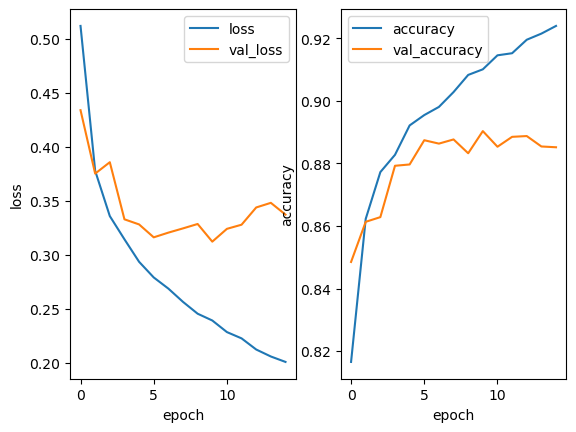

<Figure size 640x480 with 0 Axes>

In [19]:
#wyświetl wykresy uczenia
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.subplot(1,2,1)
plt.plot(loss, label = "loss")
plt.plot(val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(acc, label = "accuracy")
plt.plot(val_acc, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()
plt.tight_layout()

In [11]:
#zrob predykcję na zbiorze testowym
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 4ms/step


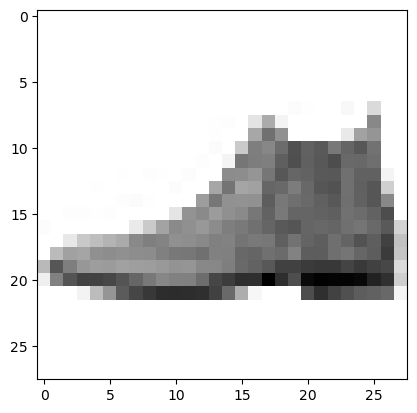

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'T-shirt/top'),
  Text(1, 0, 'Trouser'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dress'),
  Text(4, 0, 'Coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle boot')])

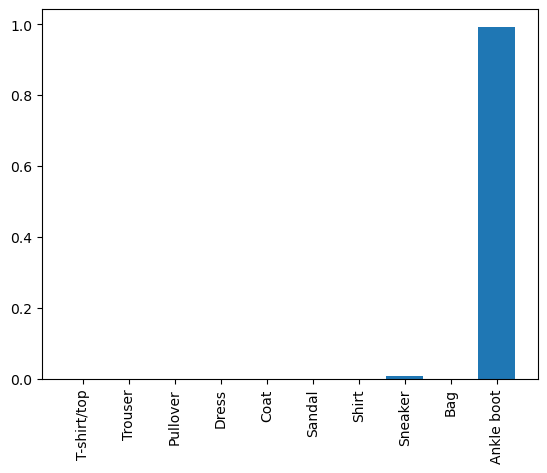

In [14]:
#wyświelt jeden z elementów zbioru testowego i wykres prawdopodobieństwa przynależności do klasy
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()
plt.bar(class_names, y_pred[0]) 
plt.xticks(rotation=90)

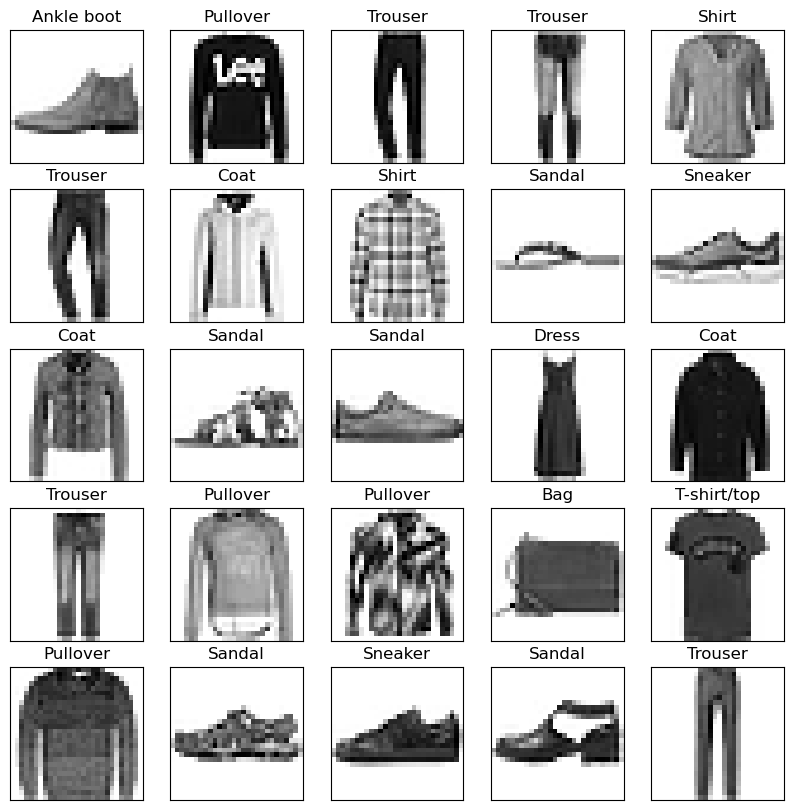

In [15]:
#wyświetl 25 pierwszych elementów zbioru x_test. Jako title wstaw pokolorowany numer bądź nazwę klasy

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[np.argmax(y_pred[i])])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
plt.show()
